In [2]:
from tensorflow import keras


model1 = keras.models.load_model('../models/pre_model_1_1_10_epochs.h5')
model2 = keras.models.load_model('../models/pre_model_2_1.h5')
model3 = keras.models.load_model('../models/pre_model_3_1_10_epochs.h5')
model4 = keras.models.load_model('../models/pre_model_4_1_10_epochs.h5')
model5 = keras.models.load_model('../models/pre_model_5_1_10_epochs.h5')
model6 = keras.models.load_model('../models/pre_model_6_1_20_2_epochs.h5')
model7 = keras.models.load_model('../models/pre_model_7_1_10_epochs.h5')
model8 = keras.models.load_model('../models/pre_model_8_1_10_epochs.h5')


In [3]:
all_models = [model1,model2,model3,model4,model5,model6,model7,model8]
rule_names = rules = [
            "Kein Scooter",
            "Scooter unvollständig/zu wenig Umgebung",
            "Scooter steht zu nah an Straße (Bordsteinkante)",
            "Scooter steht nicht frei",
            "Scooter auf Grünfläche",
            "Scooter blockiert Fahrradständer",
            "Scooter steht an ÖPNV Haltestelle / Parkverbo",
            "Scooter steht in Einfahrt / im Weg"
        ]

In [4]:
from PIL import Image
import numpy as np
# Function to load and resize an image
def load_image(img_path):
    with Image.open(img_path) as img:
        img = img.resize((512, 512))
        img = img.convert('RGB')  # Ensure image is in RGB format
        return np.array(img)


In [5]:
import matplotlib.pyplot as plt

def show_img(img_array):
    img_array.astype('uint8')
    plt.imshow(img_array)
    plt.axis('off')  # Hide the axes
    plt.show()

In [6]:
import os
import random

folder_path = "../Yoio_Park_Proof"
all_files = os.listdir(folder_path)
random_image_file = random.choice(all_files)
img_path = os.path.join(folder_path, random_image_file)
img = load_image(img_path)
img_array = np.expand_dims(img, axis=0)
print(img.shape)

(512, 512, 3)


In [28]:
import os
import random


def predict_image(models,img_path):


    img = load_image(img_path)

    for model in models:
        img_array = np.expand_dims(img, axis=0)
        predictions = model.predict(img_array)
        
        #Model 4 predicted Falsch herum i guess
        if models.index(model) !=5 :
            #if predictions[0][0] > predictions[0][1]: Wäre eine Option
            if predictions[0][0]>0.9:
                print("Verstoß")
                print(rules[models.index(model)])
                break
            else:
                print("Richtig")
        else: 
            if predictions[0][1]>0.9:
                print("Verstoß")
                print(rules[models.index(model)])
                break
            else:
                print("Richtig")


    show_img(img)
    

In [ ]:
folder_path = "../Yoio_Park_Proof"
all_files = os.listdir(folder_path)
random_image_file = random.choice(all_files)
img_path = os.path.join(folder_path, random_image_file)
#predict_image(models=all_models,img_path=img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
[[9.9966097e-01 3.3904603e-04]]


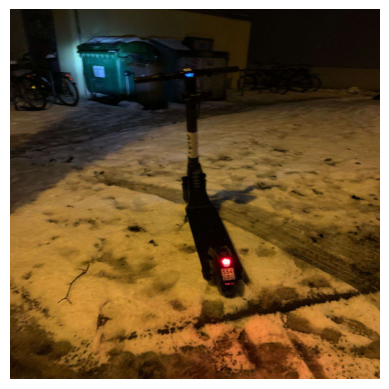

In [59]:
folder_path = "../Yoio_Park_Proof"
all_files = os.listdir(folder_path)
random_image_file = random.choice(all_files)
img_path = os.path.join(folder_path, random_image_file)
img = load_image(img_path)
img_array = np.expand_dims(img, axis=0)
predictions = model2.predict(img_array)
print(predictions)
show_img(img)

In [29]:
import pandas as pd
balanced_labels = pd.read_csv('../all_models_combine/chosen_labels.csv', sep=';',index_col=False)
balanced_labels.head()

,Image_name,Rule1,Rule3,Rule4,Rule5,Rule6,Rule7,Rule8
0,1604052003dab26a8c6cda243b281976c5bd21372db239...,0,0,0,0,0,0,0
1,1607800892c65bb02d1eb97c2be64594dbc8639f1cc454...,0,0,0,0,0,0,0
2,159319702418b21d9b655f406afdfed2578c4d6f5e821b...,0,0,0,0,0,0,0
3,1593895635519ece87c5f75f175912e855ccebd29d0a55...,0,0,0,0,0,0,0
4,159177710516a571ec317683d8ca32b144664fb355722c...,0,0,0,0,0,0,0


In [43]:

columns=["Image_name","Rule1","Rule3","Rule4","Rule5","Rule6","Rule7","Rule8"]
predictions_df = pd.DataFrame(columns=columns)

i=0
while i <= 500:
    folder_path = "../Yoio_Park_Proof/"
    img_name=str(balanced_labels.sample(1).iloc[0,0])


    img = load_image(folder_path+img_name)

    predictions_array =[img_name]

    for model in all_models:
        img_array = np.expand_dims(img, axis=0)
        predictions = model.predict(img_array)
        #Model 4 predicted Falsch herum i guess
        if all_models.index(model) !=4 :
            #if predictions[0][0] > predictions[0][1]: Wäre eine Option
            if predictions[0][0]>0.95:
                int_pred=1
            else:
                int_pred=0
        else: 
            if predictions[0][1]>0.95:
                int_pred=1
            else:
                int_pred=0
        predictions_array.append(int_pred)

    predictions_df.loc[len(predictions_df)] = predictions_array
    #new_row = pd.DataFrame(predictions_array, columns=columns)
    #predictions_df = pd.concat([predictions_array,new_row],ignore_index=True)

    i += 1

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 958ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 454ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [41]:
print(predictions_df.sample(10))

                                           Image_name  Rule1  Rule3  Rule4  \
77  1613915686607798624b5ef96ea3b5e1a41308f2e9d3a3...      0      0      0   
15  16027880326d4747312c80224648d3138d5c132a3d1005...      0      0      0   
25  161377535276d70a450315b306606ac3c65dfabf65d055...      0      0      0   
79  160285321384e1663e96f201cb488c35cb71e409bd7644...      0      0      0   
39  159309724186e4600310c7b7645763b30269b77c51dfad...      0      0      0   
38  16141750935b58e989a237bc43467ae4f403fe441a5ebd...      0      0      0   
6   16020700440b52ab984dddc0460e962367f3486919496e...      0      1      0   
83  15956040787ce89d7241da28e209fec13ed05a59b2c329...      0      0      0   
71  16063820318f3cada7a88211453d3fa1ff520f57e43804...      0      0      0   
90  16031299638078e327f17f2529bef6b14f0952aee07ddc...      0      0      0   

    Rule5  Rule6  Rule7  Rule8  
77      0      0      0      0  
15      0      0      0      0  
25      0      0      0      0  
79      1

In [44]:
predictions_df.to_csv('../all_models_combine/predicted_labels_2.csv', sep=';', index=False)